In [1]:
# ------------------------------------------------------------------------
#
# TITLE - transient_spiral_phi0.ipynb
# AUTHOR - James Lane
# PROJECT - AST1501
# CONTENTS:
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Determine the circular velocity power law for MWPotential2014
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
import numpy as np
import pdb, sys, importlib, copy, importlib

## Plotting
import matplotlib
from matplotlib import pyplot as plt

## Astropy
from astropy import units as apu

## galpy
from galpy import orbit
from galpy import potential

In [3]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
pot = potential.MWPotential2014

The model looks something like:

$
V_{p}(R) = V_{p,0} \big( \frac{R}{\mathrm{8 kpc}} \big)^{\beta}
$

In the `log`

$
\log( V_{p}(R) ) = \log( V_{p,0} ) + \beta \big( \log ( R ) - \log( \mathrm{8 kpc} ) \big)
$

In [12]:
rs = np.arange(2,20,0.05)*apu.kpc
zs = np.zeros_like(rs.value)*apu.kpc
potential.turn_physical_on(pot)
vc = potential.vcirc(pot,rs,zs).value

In [23]:
beta = np.diff( np.log10(vc) ) / np.diff( np.log10(rs.value) )

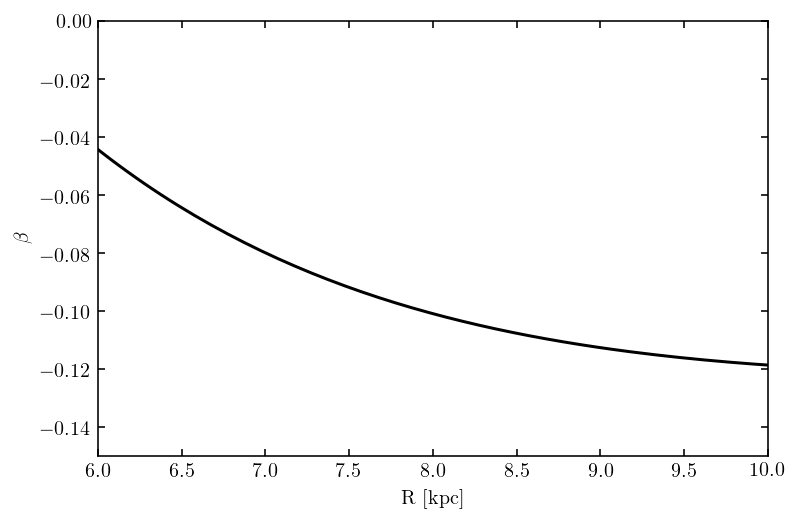

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( (rs.value+np.diff(rs.value)[0]/2)[:-1], beta, color='Black' )
ax.set_xlabel(r'R [kpc]')
ax.set_ylabel(r'$\beta$')
ax.set_xlim(6,10)
ax.set_ylim(-0.15,0)

fig.set_facecolor('White')
plt.show()

In [34]:
def power_law(x,a,r0,beta):
    return a*np.power(x/r0,beta)
#def

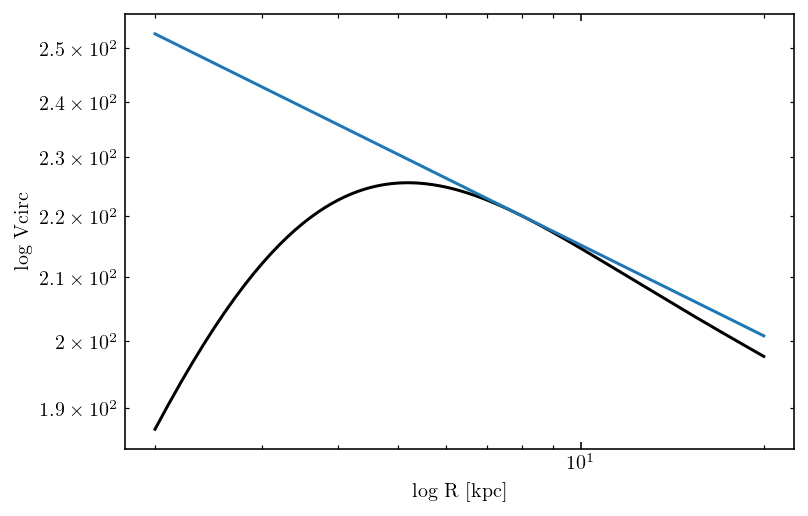

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( rs.value, vc, color='Black' )
ax.plot( rs.value, power_law(rs.value,220,8,-0.1) )
ax.set_xlabel(r'log R [kpc]')
ax.set_ylabel(r'log Vcirc')
ax.set_xscale('log')
ax.set_yscale('log')

fig.set_facecolor('White')
plt.show()